# Programming Exercise 7: Principal Component Analysis

Welcome to part 2 of programming exercise 7, Principal component analysis (PCA). TIn this exercise, we will use principal component analysis (PCA) to perform dimensionality reduction. We will experiment with an example 2D dataset to get intuition on how PCA works.

**Instruction:**
- To run code, click on a corresponding cell and press `Shift+Enter` keys simultaneously or `Click Cell -> Run Cell`.

**Objective:**
- To learn how to reduce the dimensionality of data for efficient procession using PCA.

**You will learn how to:**
- Implement PCA for dimensionality reduction of data (from 2D to 1D).

# Introduction #

One of the challenges in the machine learning field is something referred to as `curse of dimensionality` - in which algorithms fail to effectively and efficiently train on the dataset because of the size of the feature space. To this challenge, unsupervised learning has a greater  counter - `dimensionality reduction`.

Dimensionality reduction algorithms seeks to project high-dimensional data to a low-dimensional space, retaining as much of the salient information as possible while removing redundant information. When data is in low-dimensional space, machine learning algorithms are ale to identify interesting patterns more effectively and efficiently.

There are two major categories of dimensionality reduction:
- `linear projection` - which involves linear projection of data from high-dimensional space to a low-dimensional space. This includes techniques such as:
    - `principal component analysis`
    - `singular value decomposition`
    - `random projection`.
- `manifold learning` also referred to as `nonlinear dimensionality redunction` - this involves techniques such as:
    - `isomap` which learns the curved distance (also called geodesic distance) between points rather than the Eucledean distance.
    - `Muilti-dimensional scaling (MDS)`
    - `Locally linear embedding (LLE)`
    - `t-Distributed Stochastic Neighbor Embedding (t-SNE)`
    - `Independent component analysis`
    
In this exercise, we apply the linear projection, `singular value decomposition` to project 2D data to 1 dimensional space.

## Import packages ##

First lets run the cell below to import all the packages that you will need for this exercise.
- [NumPy](http://www.numpy.org) is the fundamental package for scientific computing with Python
- [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) is a common library to load `.mat` files in Python.
- [Matplotlib](http://matplotlib.org) is a common library to plot graphs in python.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import scipy.io as sio # To load '.mat' files.

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### 2.1 - Load and visualize example dataset ##

To help us understand how PCA works, we will begin with a 2D dataset which has one direction of large variation and one of smaller variation. In this part of the exercise, we will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

So let us load our provided sample dataset. 

In [2]:
df_path = 'data/ex7data1.mat' 
data    = sio.loadmat(df_path)
X = data['X']

To visualize the data distribution, we first need to implement the function `plot_data_points()` to plot the data points.

In [3]:
def plot_data_points(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], 
                c='white', marker='o', 
                edgecolor='b', s=50,label='Original data points')
    plt.grid(False)
    plt.tight_layout()
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.axis([-3.0, 3.0, -3.0, 3.0])
    plt.legend()
    plt.grid(True)
    
#plot_data_points(X) # Calling he plot_dataset function

### 2.2 - Feature normalization before implementing PCA###

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [4]:
# Function to normalize the features of the given dataset
def feature_normalizer(X):
    X_mu = X.mean(axis=0) # Compute the mean
    X_std = X.std(axis=0) # Compute the standard deviation
    X_norm = (X - X_mu) / X_std
    return X_norm, X_mu, X_std

### 2.3 - Implementing PCA using SVD decomposition ###

Using the normalized data, you can now compute the principal components by first computing the covariance matrix, then run SVD on it to compute the principal components where U will contain the principal components and S will contain a diagonal matrix.

**2.3.1 - Compute the covariance matrix $\Sigma$**

In [5]:
def compute_cov_matrix(X_norm):
    Sigma = np.cov(X_norm.T)     # Computing the covariance matrix (sigma)
    return Sigma

**2.3.2 - Using SVD to decompose the covariance matrix $\Sigma$**

We use the `np.linalg.svd()` to decompose a computed cov-matrix of normalized data.

In [6]:
def decompose_cov_matrix(Sigma): 
    U,S,V = np.linalg.svd(Sigma) # svd decomposition
    return U,S,V

After computing the principal components, we can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, X to Z (e.g., projecting the data from 2D to 1D).

This function takes as input the normalized $X$, $U$ and $k^{th}$ components and projects the data onto the principal component.

In [7]:
def project_data(X_norm,U,k):
    W = U.T[:,:k]             # the matrix containing the first k components #Ureduce
    Z = X_norm.dot(W)         # Projection of X_norm onto Z  
    return W,Z                

Now let us perform PCA by running the cell below.
- First we perform feature normalization
- Secondly, we compute the covariance matrix $\Sigma$ of normalized data $X$.
- Thirdly, decompose the covariance matrix $\Sigma$ using SVD.
- Fourthly, we project the normalized data

In [8]:
X_norm,X_mu, X_std= feature_normalizer(X) # Calling the function to normalize the input X
Sigma = compute_cov_matrix(X_norm)
U,S,V = decompose_cov_matrix(Sigma)
W,Z   = project_data(X_norm,U,k=1)

m = len(Z)                                 # length of the projected data (Z)
X_proj1 = X_norm.dot(U[:,0].reshape(-1,1)) # Projecting data in the first eigen vector
X_proj2 = X_norm.dot(U[:,1].reshape(-1,1)) # Projecting data in the  second eigen vector
u1 = U[:,0].reshape(-1,1)
u2 = U[:,1].reshape(-1,1)
print('\nProjection of the first example is %0.3f.\n'%float(Z[0])) #Expected value of about 1.481
print('Computed eigenvectors are:\n\n',U)
print('\nTop principal component is',U[:,0])


Projection of the first example is 1.496.

Computed eigenvectors are:

 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Top principal component is [-0.70710678 -0.70710678]


### 2.4 - Plot eigen vectors ###

To have intuition of how things are working, we can begin by drawing the eigenvectors centered at mean of data. These lines show the directions of maximum variations in the dataset. 

**Plot eigen vectors** by implementing the `plot_eigen_vectors()`.

In [9]:
def plot_eigen_vectors(X,U,ax = None):
    X_mu = X.mean(axis=0)
    u1 = U[:,0].reshape(-1,1)
    u2 = U[:,1].reshape(-1,1)
    ax = ax or plt.gca()
    #plot_data_points(X)
    ax.scatter(X[:, 0], X[:, 1], 
                c='white', marker='o', 
                edgecolor='b', s=50,label='Dataset points')
    plt.plot([-3.0, 3.0], [-3.0*u1[1]/u1[0], 3.0*u1[1]/u1[0]], "k-", linewidth=1, label="PC1 Axis")
    plt.plot([-3.0, 3.0], [-3.0*u2[1]/u2[0], 3.0*u2[1]/u2[0]], "k--", linewidth=1,label="PC2 Axis")
    plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{pc_1}$", fontsize=22)
    plt.text(u2[0] + 0.1, u2[1], r"$\mathbf{pc_2}$", fontsize=22)
    for axis, color in zip(U, ["red","green"]):
        start, end = X_mu, X_mu + 1 * axis
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(facecolor=color, width=2.0))
    ax.set_aspect('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.axis([-3.0, 3.0, -3.0, 3.0])
    plt.legend()
    plt.grid(True)

Next we **plot first principal component axis** on which data will have to be projected (**1D**) in order to maintain a degree of variance. So we implement `plot_first_principal_axis()` function.

In [10]:
def plot_first_principal_axis(X,U, ax = None):
    X_mu = X.mean(axis=0)
    u1 = U[:,0].reshape(-1,1)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], 
                c='white', marker='o', 
                edgecolor='b', s=50,label='Dataset points')
    plt.plot([-3.0, 3.0], [-3.0*u1[1]/u1[0], 3.0*u1[1]/u1[0]], "k-", linewidth=1, label="PC1 Axis")
    plt.text(u1[0] + 0.1, u1[1]- 0.05, r"$\mathbf{pc_1}$", fontsize=22)
    start, end =X_mu, X_mu + 1 * U[:,0]
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='red', width=2.0))
    ax.set_aspect('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.axis([-3.0, 3.0, -3.0, 3.0])
    plt.legend()
    plt.grid(True)

Next we implement the `plot_second_principal_axis()` of our second principal component axis. 

In [11]:
def plot_second_principal_axis(X,U, ax = None):
    X_mu = X.mean(axis=0)
    u2 = U[:,1].reshape(-1,1)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c='white', marker='o', 
               edgecolor='b', s=50,label='Dataset points')
    plt.plot([-3.0, 3.0], [-3.0*u2[1]/u2[0], 3.0*u2[1]/u2[0]], "k--", linewidth=1,label="PC2 Axis")
    plt.text(u2[0] + 0.1, u2[1], r"$\mathbf{pc_2}$", fontsize=22)
    start, end =X_mu, X_mu + 1 * U[:,1]
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='green', width=2.0))
    ax.set_aspect('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.axis([-3.0, 3.0, -3.0, 3.0])
    plt.legend()
    plt.grid(True)

Now we can plot our graphs and make some observation.. 

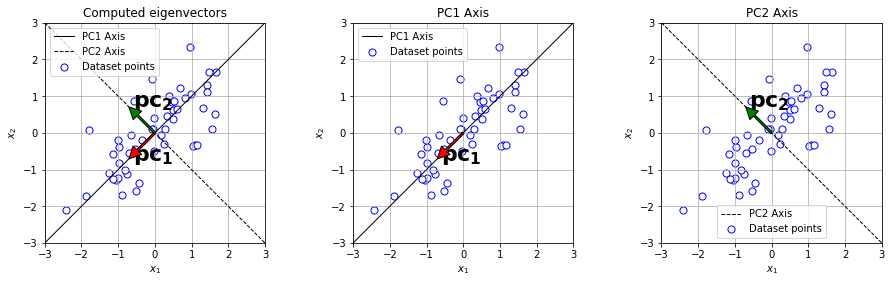

In [12]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(1, 3, 1)
plot_eigen_vectors(X_norm,U)
plt.title('Computed eigenvectors')

plt.subplot(1, 3, 2)
plot_first_principal_axis(X_norm,U)
plt.title('PC1 Axis')

plt.subplot(1, 3, 3)
plot_second_principal_axis(X_norm,U)
plt.title('PC2 Axis')
plt.show()

Now we plot how projected data on each individual principal component axis, PC1 and PC2

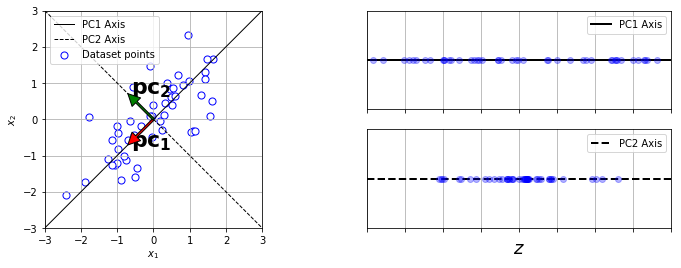

In [13]:
plt.figure(figsize=(12,4))
plt.subplot2grid((2,2), (0, 0), rowspan=2)
plot_eigen_vectors(X_norm,U)

plt.subplot2grid((2,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2, label="PC1 Axis")
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.legend()
plt.grid(True)

plt.subplot2grid((2,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2, label="PC2 Axis")
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z$", fontsize=18)
plt.legend()
plt.grid(True)

### 2.5 - Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, we can approximately recover the data by projecting them back onto the original high dimensional space.

In [14]:
# The function recovers an approximation of the original data when using the projected data
def restore_data(Z, W):
    return Z.dot(W.T) # Z.dot(W.T)= (50,1)x(1,2)  = (50,2)

In [15]:
X_res = restore_data(Z, W)
print('Recovered approximation of the first example is ',X_res[0])

Recovered approximation of the first example is  [-1.05805279 -1.05805279]


### 2.6 - Visualizing the projections ###

After performing both the `projection` and `approximate reconstruction` we need to plot them to show how the projection affects the data.

In [16]:
def plot_projected_data(X):
    plot = plt.scatter(X[:,0], X[:,1], s=50, facecolors='none', 
                       edgecolors='r',label='PCA Reduced Data Points')
    plt.grid(False)
    plt.tight_layout()s
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.legend()

In [17]:
# Visualizing the projections
def visualize_projections(X_norm, X_rec):  

    plot = plt.scatter(X_norm[:, 0], X_norm[:, 1], c='white', marker='o', 
                edgecolor='b', s=50,label='Original data points')

    plot = plt.scatter(X_rec[:,0], X_rec[:,1], c='white', marker='o', 
                       edgecolors='r', s=50, label='PCA Approximated 2D Data Points')
    
    plt.plot([-3.0, 3.0], [-3.0*u1[1]/u1[0], 3.0*u1[1]/u1[0]], "k--", linewidth=1, label="PC1 Axis")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.axis([-3.0, 3.0, -3.0, 3.0])
    
    for x in range(X_norm.shape[0]):
        plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    plt.legend()
    plt.grid(True)

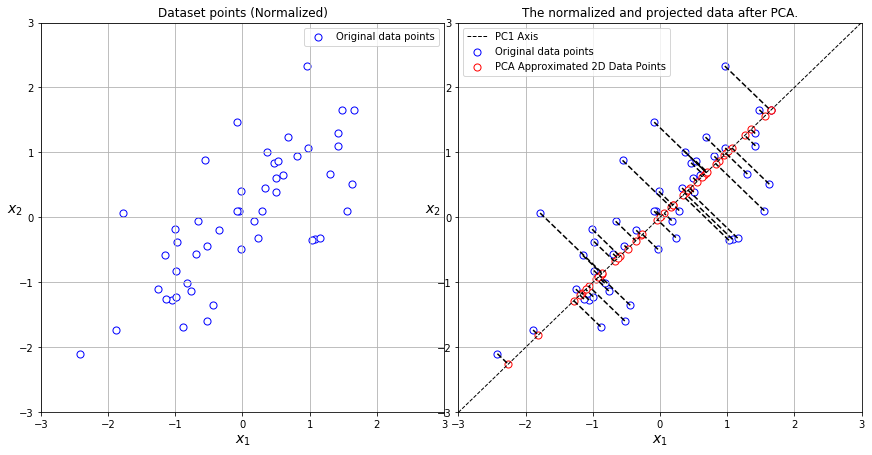

In [18]:
# Plot both data points and the projected data on PC 1 axis
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(1, 2, 1)
plot_data_points(X_norm) # Calling the plot_dataset function
plt.title('Dataset points (Normalized)')

plt.subplot(1, 2, 2)
visualize_projections(X_norm, X_res)
plt.title('The normalized and projected data after PCA.')
plt.show()

In the figures above, on the left is the plot the original normalized data points and on the right is a plot of normalized data points indicated with the blue circles, while the projected data points are indicated with the red circles. The projection eectively only retains the information in the direction given by $W$.

### 2.7 - Explained variance ratio ###

The explained variance ratio of each principal component indicates the proportion of the dataset's variance  that lies along the axis of each principal component.

In [19]:
def compute_explained_var_ratio(X_norm,X_res):
    m = X_norm.shape[0]
    projections = X_norm - X_res
    ave_sqrd_proj_err    = 1/m * (projections**2).sum()
    tot_variance_in_data = 1/m * (X_norm**2).sum()
    return ave_sqrd_proj_err / tot_variance_in_data

In [20]:
print('\nThe explained variance ratio of projecting our 2D dataset onto 1D space along PC1 axis is %.2f'
      %((1 - compute_explained_var_ratio(X_norm,X_res))*100)+'%.\n')
print('This implies by projecting down to 1D, the variance in data that was lost is about %.2f'\
      %(compute_explained_var_ratio(X_norm,X_res)*100)+'%.\n')


The explained variance ratio of projecting our 2D dataset onto 1D space along PC1 axis is 86.78%.

This implies by projecting down to 1D, the variance in data that was lost is about 13.22%.



# **Implementing PCA in scikit-learn (Optional material) #

In [21]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#### 1 - Normalize features before applying PCA ####

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()           # Create aan object of the StandardScaler()
X_norm = scaler.fit_transform(X)    # Standardizing X

#### 2 - Transform data using PCA ####

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X1D = pca.fit_transform(X_norm)
X2D_approx = pca.inverse_transform(X1D) 

#### 3 -  Visualizations ####

In [24]:
# Draw the eigenvectors centered at mean of data. These lines show the
# directions of maximum variations in the dataset.
def plot_principal_components(pca, ax = None): # Compute mu, the mean of the each feature
    # plot data
    ax = ax or plt.gca()
    start, end =pca.mean_, pca.mean_ + 1 * pca.components_[0]
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='red', width=2.0))

In [25]:
def plot_data_approximations(X, y=None):
    plt.scatter(X[:,0], X[:,1], c='white', marker='o', 
                       edgecolors='r', s=50, label='PCA approximated 2D data Points')
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

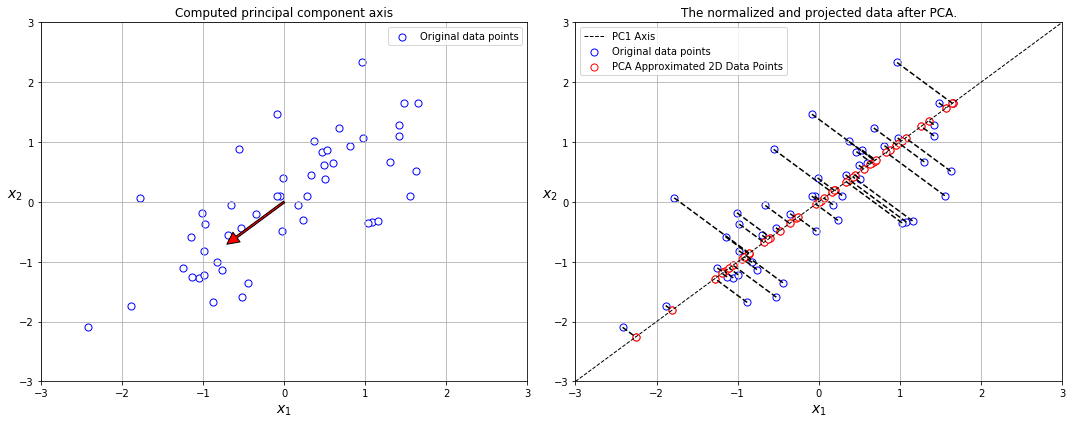

In [26]:
# Plot both data points and the resultant decision boundary
plt.figure(figsize=(15,6))
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(1, 2, 1)
plot_data_points(X_norm) # Calling the plot_dataset function
plot_principal_components(pca, ax = None)
plt.title('Computed principal component axis')

plt.subplot(1, 2, 2)
visualize_projections(X_norm, X2D_approx)
plot_data_approximations(X2D_approx)
plt.title('The normalized and projected data after PCA.')
plt.show()

In [27]:
print('Top principal component is',pca.components_[0])

Top principal component is [-0.70710678 -0.70710678]


#### 4 - Explained variance ratio ####

In [28]:
print('\nThe explained variance ratio of projecting our 2D dataset onto 1D space along PC1 axis is %.2f'\
      %(pca.explained_variance_ratio_*100)+'%.\n')
print('This implies by projecting down to 1D, the variance in data that was lost is about %.2f'\
      %((1 - pca.explained_variance_ratio_.sum())*100)+'%.\n')


The explained variance ratio of projecting our 2D dataset onto 1D space along PC1 axis is 86.78%.

This implies by projecting down to 1D, the variance in data that was lost is about 13.22%.



****Cooooool .... our results are consistent!!**

### References

[1] https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib

[2] https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2

[3] http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

[4] http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

[5] https://districtdatalabs.silvrback.com/principal-component-analysis-with-python

[6] https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html